[View in Colaboratory](https://colab.research.google.com/github/juzkev/A-Bridged/blob/master/LM_Classification.ipynb)

#Imports

In [5]:
# Time
import time
start_t = time.time()

# Google Drive
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyPDF2
# !pip install pypdf2
# import PyPDF2

#textract
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libpulse-dev
!pip install textract
import textract

# DS essentials
import pandas as pd
import numpy as np

# NLP
import re



##### Additional Setup for Google Colab Fast AI & PyTorch #####

## Install Pytorch and torchvision
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl torchvision 
  
# ## Install Fastai (Github version)
# !git clone https://github.com/fastai/fastai.git
# !pip install -r fastai/requirements.txt
# !pip install ./fastai

#Install Fastai (pip)
!pip install fastai

## Install libSM
### The import of fastai is will throw an error that this library is missing. So, Installing the same.
!apt update && apt install -y libsm6 libxext6


# Install Spacy required for fastai.text
!pip install -U spacy
!python -m spacy download en

print(f'Set up Process took {time.time() - start_t} seconds')

Set up Process took 38.49512004852295 seconds


In [49]:
# GPU status
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!nvidia-smi

Fri Jun 15 00:52:06 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    69W / 149W |    992MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Downloading PDFs from Google Drive

In [7]:
# choose a local (colab) directory to store the data.
start_t = time.time()

local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

ids = {'SDG 15 - Life on Land': '16O4EAd9uQomSH5CBy8zvZklCUujk8yzn',
      'SDG 12 - Responsible Consumption and Production': '1h1n9hVcrT73a1sh9cuJDBmW0erBRa_ZS',
      'SDG 10 - Reduced Inequalities': '1SLumvZ4n4BJM3zmXdIUWEplcjx2JGMN-',
      'SDG 08 - Decent Work and Economic Growth': '1jIm9xN6PiGvnGQ9Xu0OSUZHsexuTTTaC',
      'SDG 05 - Gender Equality': '116grOjLbS7j79UPvNEz0jEb3WR-4BVMX'}

def download_files(ids):
  for name, id in ids.items():
    try:
      os.makedirs(os.path.join(local_download_path, name))
    except: pass
    file_list = drive.ListFile(
        {'q': f"'{id}' in parents"}).GetList()

    for f in file_list:
      # 3. Create & download by id.
#       print('title: %s, id: %s' % (f['title'], f['id']))
      fname = os.path.join(local_download_path, name, f['title'])
      print('downloading to {}'.format(fname))
      try:
        f_ = drive.CreateFile({'id': f['id']})
        f_.GetContentFile(fname)
      except:pass
      
download_files(ids)

print(f'Downloading the PDFs took {time.time() - start_t} seconds')

downloading to /content/data/SDG 15 - Life on Land/Reclaiming the City- Waterfront Development in Singapore.pdf
downloading to /content/data/SDG 15 - Life on Land/ANIMAL PROTECTION LAWS OF SINGAPORE AND MALAYSIA.pdf
downloading to /content/data/SDG 15 - Life on Land/SG sustainable future, law governance and management.pdf
downloading to /content/data/SDG 15 - Life on Land/-A FINE CITY IN A GARDEN-ENVIRONMENTAL LAW AND GOVERNANCE IN SINGAPORE.pdf
downloading to /content/data/SDG 15 - Life on Land/Kyoto Protocol.pdf
downloading to /content/data/SDG 15 - Life on Land/Convention on the Law of the  International Watercourses.pdf
downloading to /content/data/SDG 15 - Life on Land/Mekong River.pdf
downloading to /content/data/SDG 15 - Life on Land/Pulp Mill on River Uruguay.pdf
downloading to /content/data/SDG 15 - Life on Land/Mekong Agreement and Procedures.pdf
downloading to /content/data/SDG 15 - Life on Land/UNFCC.pdf
downloading to /content/data/SDG 15 - Life on Land/Env Laws SG.pdf
dow

downloading to /content/data/SDG 12 - Responsible Consumption and Production/Cleveland and Ruth 1997.pdf
downloading to /content/data/SDG 12 - Responsible Consumption and Production/Ayres 1999.pdf
downloading to /content/data/SDG 12 - Responsible Consumption and Production/Supplement to Lecture 3.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/birch-corporatesocialresponsibility-2004.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/The_Dynamics_of_Corporate_Social_Responsibility_INSEAD.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/1251121517Corporate Philanthropy in Asia.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/Contextualising CSR in Asia_ Corporate Social Responsibility in A.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/Engaging Employees in Community Investment at Pfizer.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/Stakeholder Engagement and Sustainable CorporateCommunity Investment

downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Globalization and its effects on youth employment trends in Asia.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Global Production Systems and Decent Work.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Decent Work.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Marginality_from_Myth_to_Reality.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Rising Informality.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Decent Work Objectives and Activities.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Women’s economic empowerment and inclusive growth.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Measurement of decent work.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/ORGANISING AS A CATALYST FOR PROMOTING DECENT WORK.p

# Reading the PDF into DF

In [8]:
# Reading the PDF
df = pd.DataFrame()
succ = 0
fail = 0
pattern = 'SDG (\d{2})'
s_t = time.time()

for foldername in os.listdir(local_download_path):
  for filename in os.listdir(os.path.join(local_download_path, foldername)):
    try:
      print(os.path.join(local_download_path, foldername, filename))
      
      # Old PyPDF2 code
#       read_pdf = PyPDF2.PdfFileReader(os.path.join(local_download_path, foldername, filename))
#       t = ''
#       for p in range(0, read_pdf.getNumPages()):
#         page = read_pdf.getPage(p)
#         page_content = page.extractText()
#         t += str(page_content.encode('utf-8'))

      # Textract code
      t = textract.process(os.path.join(local_download_path, foldername, filename))
    
      df=df.append({'filename': filename, 'SDG': re.search(pattern, foldername).group(1),'fulltext': t}, ignore_index=True)
      succ += 1
    except Exception as e: 
      print(e)
      fail += 1

print(f'''Successfully processed {succ}/{succ+fail} pdfs''')
print(f'Reading PDFs took {time.time()-s_t} seconds')

/content/data/SDG 05 - Gender Equality/Cross-Gender Casting.pdf
/content/data/SDG 05 - Gender Equality/Keys to Women?s Liberation in Communist China.pdf
/content/data/SDG 05 - Gender Equality/Determinants of Female?s Employment Outcomes in Vietnam.pdf
/content/data/SDG 05 - Gender Equality/Arab Spring_ Women?s Empowerment in Algeria.pdf
/content/data/SDG 05 - Gender Equality/Gender Differences in Aspirations for Career and Marriage.pdf
/content/data/SDG 05 - Gender Equality/Comfort Women of South Korea.pdf
/content/data/SDG 05 - Gender Equality/Indian Feminists in the Legal Reform Process.pdf
/content/data/SDG 05 - Gender Equality/Anti-Capitalist Feminism and Female Complicity.pdf
/content/data/SDG 05 - Gender Equality/Queer_LGBT Nigerian Diasporic Women in the USA.pdf
/content/data/SDG 05 - Gender Equality/Gender Poverty and Inequality.pdf
/content/data/SDG 05 - Gender Equality/Study of Gender as Social Practice.pdf
/content/data/SDG 05 - Gender Equality/Sexual and Gender-Based Violen

/content/data/SDG 10 - Reduced Inequalities/Stakeholder Engagement and Sustainable CorporateCommunity Investment.pdf
/content/data/SDG 10 - Reduced Inequalities/The Philanthropic Times are Changing in Asia.pdf
/content/data/SDG 10 - Reduced Inequalities/Corporate Social Responsibility and Gender Diversity.pdf
/content/data/SDG 10 - Reduced Inequalities/Corporate Measurement of Philanthropic Impacts as a Requirement for a “Happy Marriage” of Business and Society.pdf
/content/data/SDG 10 - Reduced Inequalities/Investigating Philanthropy Initiatives in Chinese Higher Education.pdf
/content/data/SDG 10 - Reduced Inequalities/Reporting on Community Investment.pdf
/content/data/SDG 10 - Reduced Inequalities/ESSAYS ON CORPORATE PHILANTHROPY AFTER CORPORATE SOCIAL IRRESPONSIBLE INCIDENTS .pdf
/content/data/SDG 10 - Reduced Inequalities/JAMASocialEntImprovingGlobalHealth8pages copy.pdf
/content/data/SDG 10 - Reduced Inequalities/Quality reporting of corporate philanthropy.pdf
/content/data/SDG 

/content/data/SDG 08 - Decent Work and Economic Growth/Rising Informality.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/ORGANISING AS A CATALYST FOR PROMOTING DECENT WORK.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Changing Employment Conditions of the Indian Workforce.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Globalization and its effects on youth employment trends in Asia.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Marginality_from_Myth_to_Reality.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Macroeconomic policy for full and productive employment and decent work for all.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Global Production Systems and Decent Work.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/The Place of Social Capital.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Measurement of decent work.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Decent Work Ob

In [9]:
df.head()

,SDG,filename,fulltext
0,05,Cross-Gender Casting.pdf,"b""Journal of International Women's Studies\nVo..."
1,05,Keys to Women?s Liberation in Communist China.pdf,b'Journal of International Women\'s Studies\nV...
2,05,Determinants of Female?s Employment Outcomes i...,b'Journal of International Women\'s Studies\nV...
3,05,Arab Spring_ Women?s Empowerment in Algeria.pdf,b'Journal of International Women\'s Studies\nV...
4,05,Gender Differences in Aspirations for Career a...,"b""Journal of International Women's Studies\nVo..."


In [10]:
# Count of articles by SDG
(df
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,20,20
08,20,20
10,31,31
12,19,19
15,28,28


In [11]:
# Short article lengths, usually not read by the pdf reader correctly
df_short =(df
           .assign(text_len = lambda x: x.fulltext.str.len())
           .query('text_len < 5000'))

# Removing these articles from analysis
df_usable = df[~df.filename.isin(df_short.filename)]

(df_usable
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,20,20
08,20,20
10,29,29
12,15,15
15,24,24


In [0]:
from fastai.text import *
import html

BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag

PATH=Path('data/aclImdb/')

CLAS_PATH=Path('data/imdb_clas/')
CLAS_PATH.mkdir(exist_ok=True)

LM_PATH=Path('data/imdb_lm/')
LM_PATH.mkdir(exist_ok=True)

col_names = ['labels','text']

chunksize=24000

In [0]:
trn_texts,val_texts = sklearn.model_selection.train_test_split(
    df_usable, test_size=0.1)

In [14]:
len(trn_texts), len(val_texts)

(97, 11)

In [15]:
(trn_texts
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,18,18
08,18,18
10,29,29
12,14,14
15,18,18


In [16]:
(val_texts
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,2,2
08,2,2
12,1,1
15,6,6


# Saving text in standard csv format with labels

In [0]:
# TODO to save the text files in the 'standard csv format with labels' as mentioned in fastai before data processing
# this is to facilitate the chunk processing of the text

(trn_texts
 [['SDG','fulltext']]
 .rename({'SDG': 'labels', 'fulltext': 'text'}, axis = 1)
 .to_csv(CLAS_PATH/'train.csv', header=False, index=False)
)

(val_texts
 [['SDG','fulltext']]
 .rename({'SDG': 'labels', 'fulltext': 'text'}, axis = 1)
 .to_csv(CLAS_PATH/'test.csv', header=False, index=False)
)

(CLAS_PATH/'classes.txt').open('w').writelines(f'{k}\n' for k in ids.keys())

# Cleaning of text and tokenising

In [0]:
re1 = re.compile(r'  +')

def fixup(x):
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))    #html.unescape() Convert all named and numeric character references (e.g. &gt;, &#62;, &x3e;) in the string to the corresponding unicode(actual) characters.

In [0]:
def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.int64)
    texts = f'\n{BOS} {FLD} 1 ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = texts.apply(fixup).values.astype(str)

    tok = Tokenizer().proc_all_mp(partition_by_cores(texts))
    return tok, list(labels)

In [0]:
def get_all(df, n_lbls):
    tok, labels = [], []
    for i, r in enumerate(df):
        print(i)
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [0]:
df_trn = pd.read_csv(CLAS_PATH/'train.csv', header=None, chunksize=chunksize)
df_val = pd.read_csv(CLAS_PATH/'test.csv', header=None, chunksize=chunksize)

In [22]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_val, val_labels = get_all(df_val, 1)

0
0


In [0]:
(LM_PATH/'tmp').mkdir(exist_ok=True)

In [0]:
np.save(LM_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(LM_PATH/'tmp'/'tok_val.npy', tok_val)

In [0]:
tok_trn = np.load(LM_PATH/'tmp'/'tok_trn.npy')
tok_val = np.load(LM_PATH/'tmp'/'tok_val.npy')

In [26]:
freq = Counter(p for o in tok_trn for p in o)
freq.most_common(25)

[('\n', 123532),
 ('\\', 95952),
 (',', 79187),
 ('the', 70302),
 ('.', 65118),
 ('of', 50227),
 ('and', 45756),
 ('\n\n', 39613),
 ('in', 31381),
 ('to', 29933),
 ('xe2', 26550),
 ('x80', 24950),
 (')', 22500),
 ('(', 21269),
 ('t_up', 20864),
 ('a', 19322),
 ('-', 15670),
 ('for', 13173),
 ('is', 12214),
 (':', 11063),
 ('that', 10496),
 ('as', 9054),
 ('on', 8977),
 ('/', 8676),
 ('\n\n ', 7520)]

In [0]:
max_vocab = 60000
min_freq = 2

In [0]:
itos = [o for o,c in freq.most_common(max_vocab) if c>min_freq]
itos.insert(0, '_pad_')
itos.insert(0, '_unk_')

# Convert String to Int representation

In [29]:
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

20059

In [0]:
trn_lm = np.array([[stoi[o] for o in p] for p in tok_trn])
val_lm = np.array([[stoi[o] for o in p] for p in tok_val])

In [0]:
np.save(LM_PATH/'tmp'/'trn_ids.npy', trn_lm)
np.save(LM_PATH/'tmp'/'val_ids.npy', val_lm)
pickle.dump(itos, open(LM_PATH/'tmp'/'itos.pkl', 'wb'))

In [0]:
trn_lm = np.load(LM_PATH/'tmp'/'trn_ids.npy')
val_lm = np.load(LM_PATH/'tmp'/'val_ids.npy')
itos = pickle.load(open(LM_PATH/'tmp'/'itos.pkl', 'rb'))

In [33]:
vs=len(itos)
vs,len(trn_lm)

(20059, 97)

#Wikitext

In [34]:
! wget -nH -r -np -P {PATH} http://files.fast.ai/models/wt103/

--2018-06-15 00:49:09--  http://files.fast.ai/models/wt103/
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857 [text/html]
Saving to: ‘data/aclImdb/models/wt103/index.html’

models/wt103/index. 100%[===================>]     857  --.-KB/s    in 0s      

2018-06-15 00:49:09 (114 MB/s) - ‘data/aclImdb/models/wt103/index.html’ saved [857/857]

Loading robots.txt; please ignore errors.
--2018-06-15 00:49:09--  http://files.fast.ai/robots.txt
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 404 Not Found
2018-06-15 00:49:09 ERROR 404: Not Found.

--2018-06-15 00:49:09--  http://files.fast.ai/models/wt103/?C=N;O=D
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 857 [text/html]
Saving to: ‘data/aclImdb/models/wt103/index.html?C=N;O=D’

models/wt103/index. 100

models/wt103/bwd_wt 100%[===================>] 440.97M  78.0MB/s    in 5.2s    

2018-06-15 00:49:19 (85.6 MB/s) - ‘data/aclImdb/models/wt103/bwd_wt103_enc.h5’ saved [462387634/462387634]

--2018-06-15 00:49:19--  http://files.fast.ai/models/wt103/fwd_wt103.h5
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 462387687 (441M) [text/plain]
Saving to: ‘data/aclImdb/models/wt103/fwd_wt103.h5’

models/wt103/fwd_wt 100%[===================>] 440.97M  78.1MB/s    in 6.2s    

2018-06-15 00:49:25 (70.9 MB/s) - ‘data/aclImdb/models/wt103/fwd_wt103.h5’ saved [462387687/462387687]

--2018-06-15 00:49:25--  http://files.fast.ai/models/wt103/fwd_wt103_enc.h5
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 462387634 (441M) [text/plain]
Saving to: ‘data/aclImdb/models/wt103/fwd_wt103_enc.h5’

models/wt103/fwd_wt 100%[===================>] 440.97M  85.9MB/s    in 5.2s    

2018-06-15 00:49:30

In [0]:
em_sz,nh,nl = 400,1150,3

In [0]:
PRE_PATH = PATH/'models'/'wt103'
PRE_LM_PATH = PRE_PATH/'fwd_wt103.h5'

In [0]:
wgts = torch.load(PRE_LM_PATH, map_location=lambda storage, loc: storage)

In [0]:
enc_wgts = to_np(wgts['0.encoder.weight'])
row_m = enc_wgts.mean(0)

In [0]:
itos2 = pickle.load((PRE_PATH/'itos_wt103.pkl').open('rb'))
stoi2 = collections.defaultdict(lambda:-1, {v:k for k,v in enumerate(itos2)})

In [0]:
new_w = np.zeros((vs, em_sz), dtype=np.float32)
for i,w in enumerate(itos):
    r = stoi2[w]
    new_w[i] = enc_wgts[r] if r>=0 else row_m

In [0]:
wgts['0.encoder.weight'] = T(new_w)
wgts['0.encoder_with_dropout.embed.weight'] = T(np.copy(new_w))
wgts['1.decoder.weight'] = T(np.copy(new_w))

In [0]:
wd=1e-7
bptt=70
bs=52
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [0]:
trn_dl = LanguageModelLoader(np.concatenate(trn_lm), bs, bptt)
val_dl = LanguageModelLoader(np.concatenate(val_lm), bs, bptt)
md = LanguageModelData(PATH, 1, vs, trn_dl, val_dl, bs=bs, bptt=bptt)

In [0]:
drops = np.array([0.25, 0.1, 0.2, 0.02, 0.15])*0.7

In [0]:
learner= md.get_model(opt_fn, em_sz, nh, nl, 
    dropouti=drops[0], dropout=drops[1], wdrop=drops[2], dropoute=drops[3], dropouth=drops[4])

learner.metrics = [accuracy]
learner.freeze_to(-1)

In [0]:
learner.model.load_state_dict(wgts)

In [0]:
lr=1e-3
lrs = lr

In [56]:
learner.fit(lrs/2, 1, wds=wd, use_clr=(32,2), cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      5.277584   4.921897   0.234921  


[array([4.9219]), 0.2349206958485346]

In [0]:
learner.save('lm_last_ft')

In [0]:
learner.load('lm_last_ft')

In [0]:
learner.unfreeze()

In [62]:
learner.lr_find(start_lr=lrs, end_lr=lrs*10, linear=True)

epoch      trn_loss   val_loss   accuracy   
    0      6.62558    6.696222   0.135009  


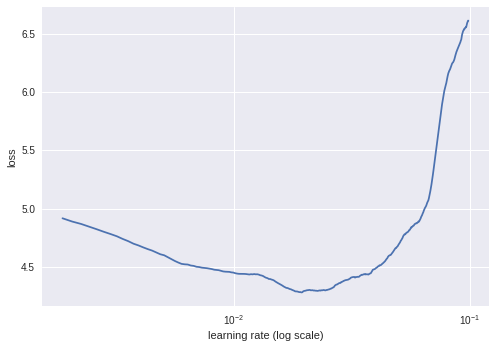

In [63]:
learner.sched.plot()

In [0]:
learner.fit(lrs, 1, wds=wd, use_clr=(20,10), cycle_len=15)

epoch      trn_loss   val_loss   accuracy   
    0      4.061642   3.952086   0.296544  
 23%|██▎       | 122/533 [01:01<03:27,  1.98it/s, loss=3.83]

    1      3.622464   3.802402   0.310622  
 46%|████▌     | 244/533 [02:00<02:23,  2.02it/s, loss=3.4] 

    2      3.348712   3.740809   0.317561  
 59%|█████▉    | 315/533 [02:36<01:48,  2.01it/s, loss=3.21]

    3      3.158924   3.717919   0.321224  
 67%|██████▋   | 356/533 [02:55<01:27,  2.03it/s, loss=3.03]

    4      3.008513   3.713541   0.322606  
 71%|███████   | 379/533 [03:09<01:17,  2.00it/s, loss=2.92]

    5      2.926967   3.695769   0.32617   
  8%|▊         | 42/533 [00:21<04:08,  1.98it/s, loss=2.91]

In [0]:
learner.save('lm1')

In [0]:
learner.save_encoder('lm1_enc')

In [0]:
learner.sched.plot_loss()